# Analysis of Normal Modes for a Coupled Three-Pendulum System (Multiple Configurations)
This notebook calculates and visualizes the normal modes of a coupled three-pendulum system. 
The analysis is performed for **multiple configurations** of coupling lengths `cl` and `dl`, where these are integer multiples of a base factor (0.046m).
The system's other physical parameters are defined, followed by the construction of the system matrix for each configuration. 
Eigenvalue analysis is then performed to determine the normal mode frequencies and their corresponding mode shapes (eigenvectors for each configuration.

## System Parameters and Matrix Formulation
The following code cell defines the physical parameters of the coupled pendulum system. These include spring constants, lengths, masses, moments of inertia, and the gravitational acceleration.
For the coupling lengths `cl` and `dl`, a base factor is defined, and these lengths will be varied by integer multipliers in a loop for different configurations.
Based on these parameters, the system matrix `A` is constructed for each configuration. The dynamics of the system can be described by the equation `\ddot{\vec{\theta}} = A \vec{\theta}`, where `\vec{\theta}` is the vector of angular displacements of the pendulums. 
The eigenvalues `\lambda` of matrix `A` are related to the normal mode angular frequencies `\omega` by `\lambda = -\omega^2`. The eigenvectors of `A` represent the normal mode shapes, indicating the relative amplitudes of motion for each pendulum in that specific mode.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Physical Constants and Parameters (from sim.py)
# These were previously in the __main__ section or as example values
g_const = 9.81  # m/s^2
k1_val = 3.32   # N/m oder N/rad, je nach Definition von cl
k2_val = 3.04   # N/m oder N/rad
# cl_val = 0.046 * 6    # m (original value, will be set in loop)
# dl_val = 0.046 * 6    # m (original value, will be set in loop)
y_cm1_val = 0.142 # m (angenommen positiv, wenn der Schwerpunkt eine rückstellende Kraft erzeugt)
y_cm2_val = 0.28 # m (kann auch negativ sein, was die Natur des g-Terms ändert)
y_cm3_val = 0.14 # m
m1_val = 0.6008    # kg
m2_val = 1.2163    # kg
m3_val = 0.6018    # kg
I1_val = m1_val * (0.28) ** 2 / 3.0    # kg*m^2
I2_val = m2_val * (0.56) ** 2 / 3.0   # kg*m^2
I3_val = m3_val * (0.28) ** 2 / 3.0   # kg*m^2

# --- Iteration over different cl and dl configurations ---
configurations = [(5, 1), (6, 1), (6, 2), (6, 4), (6, 6)]
base_length_factor = 0.046

all_results = [] # To store results for file writing and later plotting

for c_multiplier, d_multiplier in configurations:
    config_label = f"{c_multiplier}-{d_multiplier}"
    print(f"\n--- Processing Configuration: {config_label} ---")
    
    # Calculate cl_val and dl_val for the current configuration
    cl_val = base_length_factor * c_multiplier
    dl_val = base_length_factor * d_multiplier
    print(f"Setting cl_val = {cl_val:.4f} m, dl_val = {dl_val:.4f} m")
    
    # Define the elements of the matrix A (adapted from sim.py)
    A11 = -((cl_val**2 * k1_val) + (y_cm1_val * m1_val * g_const)) / I1_val
    A12 = (k1_val * cl_val**2) / I1_val
    A13 = 0.0
    A21 = (k1_val * cl_val**2) / I2_val
    A22 = -((k2_val * dl_val**2) + (k1_val * cl_val**2) + (y_cm2_val * m2_val * g_const)) / I2_val
    A23 = (k2_val * dl_val**2) / I2_val
    A31 = 0.0
    A32 = (k2_val * dl_val**2) / I3_val
    A33 = -((k2_val * dl_val**2) + (y_cm3_val * m3_val * g_const)) / I3_val
    
    A_matrix = np.array([
        [A11, A12, A13],
        [A21, A22, A23],
        [A31, A32, A33]
    ])
    print(f"Systemmatrix A for {config_label}:")
    print(A_matrix)
    
    eigenvalues_A, eigenvectors_A = np.linalg.eig(A_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors to ensure consistent mode ordering
    # Eigenvalues from np.linalg.eig are not guaranteed to be sorted.
    # Sorting by eigenvalue (ascending) ensures modes are ordered from lowest to highest frequency.
    sorted_indices = np.argsort(eigenvalues_A)
    eigenvalues_A_sorted = eigenvalues_A[sorted_indices]
    eigenvectors_A_sorted = eigenvectors_A[:, sorted_indices]
    
    print(f"Eigenvalues of A for {config_label} (lambda = -omega^2, sorted):")
    print(eigenvalues_A_sorted)
    
    omega_squared_values = -eigenvalues_A_sorted
    angular_frequencies_rad_s = np.sqrt(np.maximum(0, omega_squared_values.astype(complex))).real
    normal_mode_frequencies_hz = angular_frequencies_rad_s / (2 * np.pi)
    
    print(f"Normal Mode Frequencies for {config_label} (f in Hz, sorted by eigenvalue):")
    print(normal_mode_frequencies_hz)
    print(f"Normal Mode Vectors for {config_label} (Eigenvectors, columns, sorted by eigenvalue):")
    print(eigenvectors_A_sorted)
    
    all_results.append({
        "config_label": config_label,
        "cl_val": cl_val,
        "dl_val": dl_val,
        "frequencies_hz": normal_mode_frequencies_hz.tolist(),
        "eigenvectors": eigenvectors_A_sorted.tolist(), # Store as list for easier JSON later if needed
        "A_matrix": A_matrix.tolist() # Also store the matrix A for reference
    })

print("\nAll results collected:")
for res in all_results:
    print(f"{res['config_label']}: cl={res['cl_val']:.4f}, dl={res['dl_val']:.4f}, Frequencies (Hz) = {np.array(res['frequencies_hz'])}" )


--- Processing Configuration: 5-1 ---
Setting cl_val = 0.2300 m, dl_val = 0.0460 m
Systemmatrix A for 5-1:
[[-6.44901876e+01  1.11858508e+01  0.00000000e+00]
 [ 1.38133256e+00 -2.77087117e+01  5.05933854e-02]
 [ 0.00000000e+00  4.09017844e-01 -5.29625893e+01]]
Eigenvalues of A for 5-1 (lambda = -omega^2, sorted):
[-64.90560133 -52.96336737 -27.29251981]
Normal Mode Frequencies for 5-1 (f in Hz, sorted by eigenvalue):
[1.28221608 1.15826498 0.83146113]
Normal Mode Vectors for 5-1 (Eigenvectors, columns, sorted by eigenvalue):
[[-0.99931031 -0.00184608 -0.2879414 ]
 [ 0.03711182 -0.00190235 -0.95752649]
 [-0.00127099  0.99999649 -0.01525689]]

--- Processing Configuration: 6-1 ---
Setting cl_val = 0.2760 m, dl_val = 0.0460 m
Systemmatrix A for 6-1:
[[-6.94119619e+01  1.61076252e+01  0.00000000e+00]
 [ 1.98911889e+00 -2.83164980e+01  5.05933854e-02]
 [ 0.00000000e+00  4.09017844e-01 -5.29625893e+01]]
Eigenvalues of A for 6-1 (lambda = -omega^2, sorted):
[-70.17737593 -52.96336738 -27.550

## Summary of Multi-Configuration Results
The main calculation loop (in the preceding code cell) has iterated through all specified `cl-dl` configurations. 
For each configuration, it has computed:
- The system matrix `A`.
- The normal mode frequencies (in Hz), sorted by eigenvalue.
- The corresponding normal mode vectors (eigenvectors), also sorted consistently.
All these results (configuration label, `cl_val`, `dl_val`, frequencies, eigenvectors, and the A matrix) have been collected into a Python list called `all_results`.
The subsequent cells will process this `all_results` list to save the frequencies to a file and then to generate plots for each mode of each configuration.

## Saving Frequencies to File
The following code cell processes the `all_results` data collected from each configuration run. 
It extracts the configuration label and the three calculated normal mode frequencies (in Hz) for each configuration and saves them into a text file named `configurations_frequencies.txt` in the same directory as the notebook. 
The file is formatted for easy readability, with columns for the configuration and each of the three frequencies.

In [2]:
# --- Save Calculated Frequencies to a File ---

output_filename = "configurations_frequencies.txt"
# The 'all_results' list should be populated from the previous cell
header = ["Configuration", "Freq1 (Hz)", "Freq2 (Hz)", "Freq3 (Hz)"]
data_lines = []

for result in all_results:
    config_label = result["config_label"]
    frequencies = result["frequencies_hz"]
    # Ensure frequencies are sorted or consistently ordered if not already
    # The previous step now sorts eigenvalues, so frequencies derived should also be in a consistent order.
    # We expect 3 frequencies for a 3-pendulum system.
    if len(frequencies) == 3:
        data_lines.append(f"{config_label:<15} | {frequencies[0]:<10.4f} | {frequencies[1]:<10.4f} | {frequencies[2]:<10.4f}")
    else:
        data_lines.append(f"{config_label:<15} | Error: Expected 3 frequencies, got {len(frequencies)}")

with open(output_filename, 'w') as f:
    f.write(f"{header[0]:<15} | {header[1]:<10} | {header[2]:<10} | {header[3]:<10}\n")
    f.write("-" * 60 + "\n") # Separator line
    for line in data_lines:
        f.write(line + "\n")

print(f"Frequencies for all configurations saved to '{output_filename}'.")

# Optional: Print content to notebook output for quick verification
print("\nContent of the file:")
with open(output_filename, 'r') as f:
    print(f.read())

Frequencies for all configurations saved to 'configurations_frequencies.txt'.

Content of the file:
Configuration   | Freq1 (Hz) | Freq2 (Hz) | Freq3 (Hz)
------------------------------------------------------------
5-1             | 1.2822     | 1.1583     | 0.8315    
6-1             | 1.3333     | 1.1583     | 0.8354    
6-2             | 1.3333     | 1.1717     | 0.8375    
6-4             | 1.3335     | 1.2251     | 0.8441    
6-6             | 1.3356     | 1.3100     | 0.8513    



## Visualizing Normal Modes for Each Configuration
The following code cell iterates through the results for each `cl-dl` configuration stored in `all_results`.
For each configuration, it then plots each of its three normal modes (eigenvectors). 
The plots are **scatter plots**, where each point represents the relative amplitude of oscillation for one of the three pendulums. A connecting line is also drawn to help visualize the mode shape. 
The title of each plot indicates the specific configuration (e.g., '5-1'), the mode number, and its calculated frequency in Hz.


--- Generating plots for Configuration: 5-1 ---


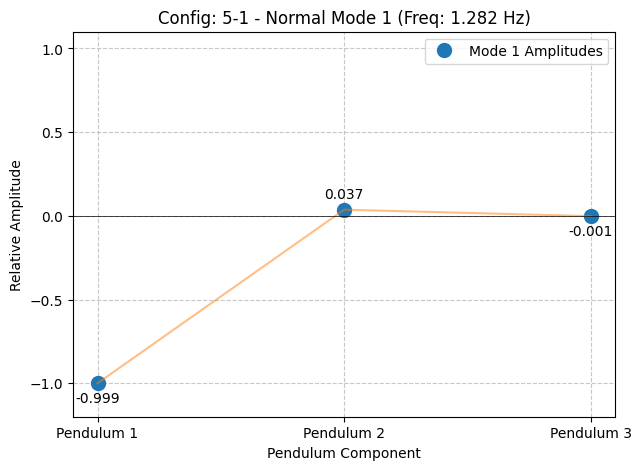

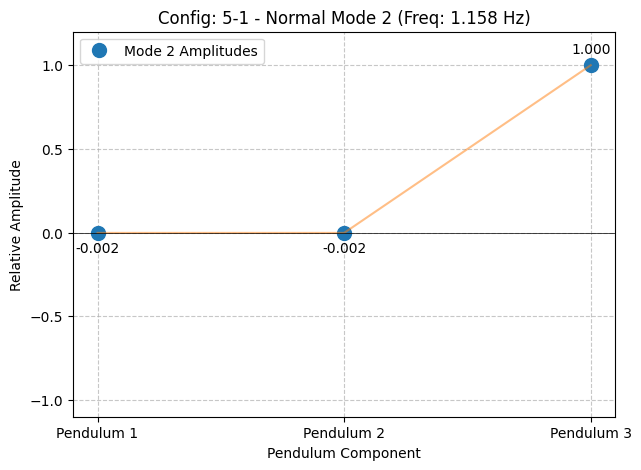

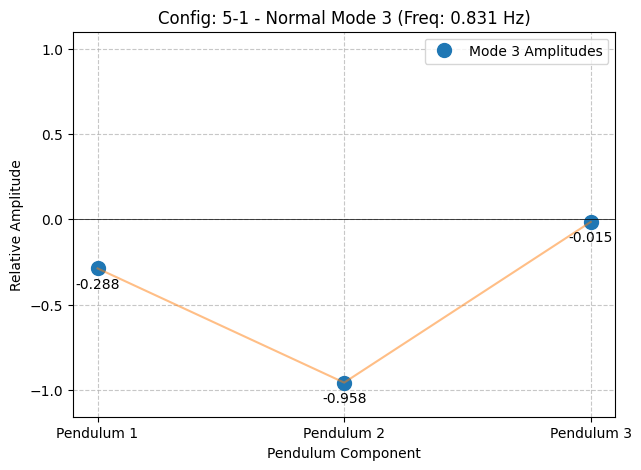


--- Generating plots for Configuration: 6-1 ---


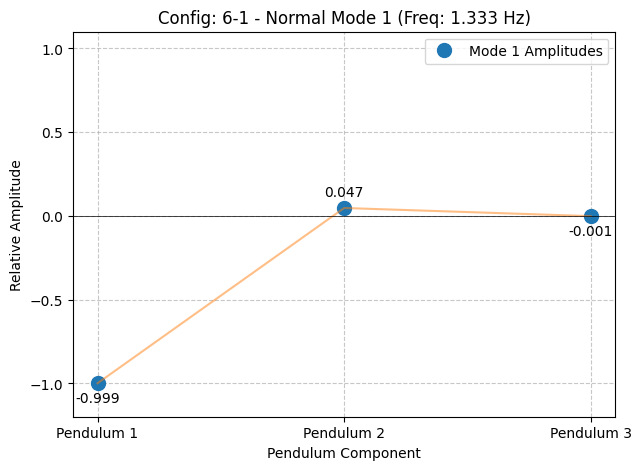

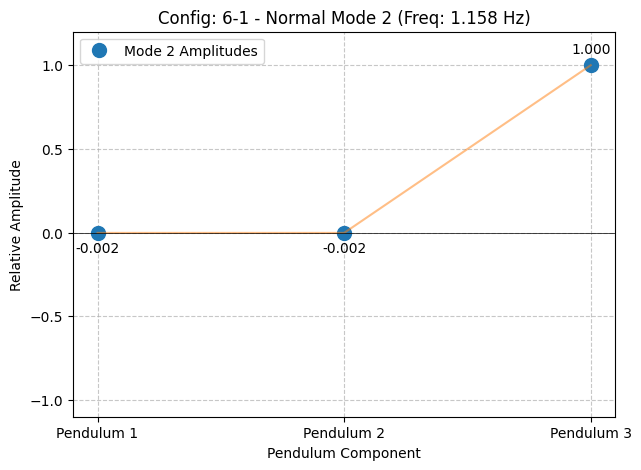

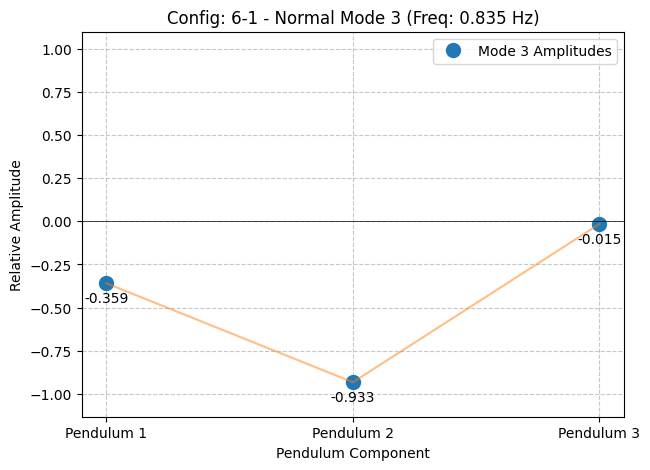


--- Generating plots for Configuration: 6-2 ---


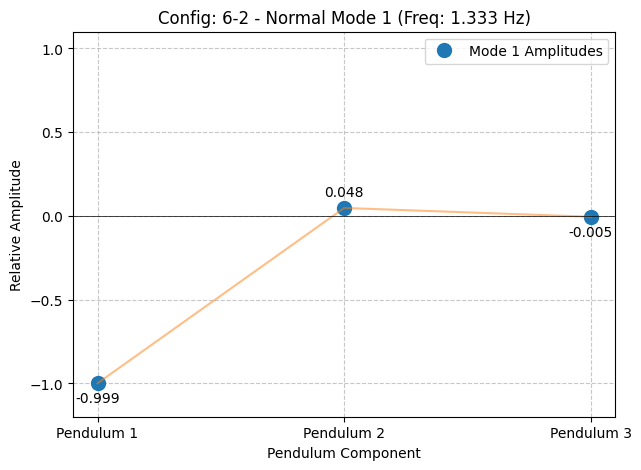

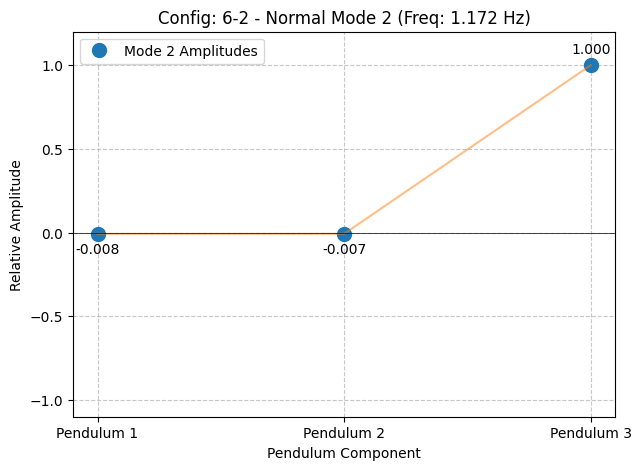

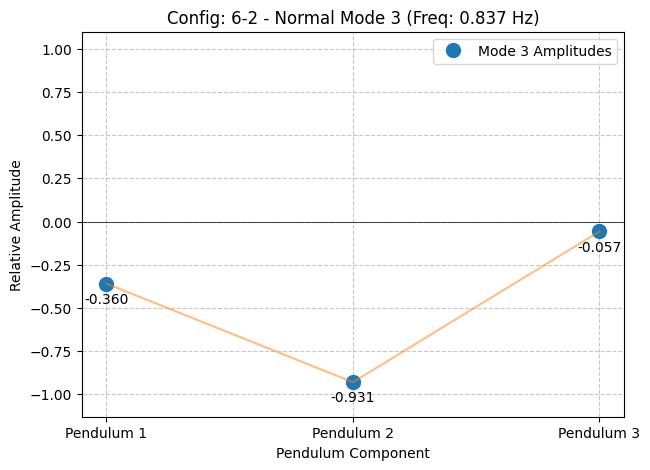


--- Generating plots for Configuration: 6-4 ---


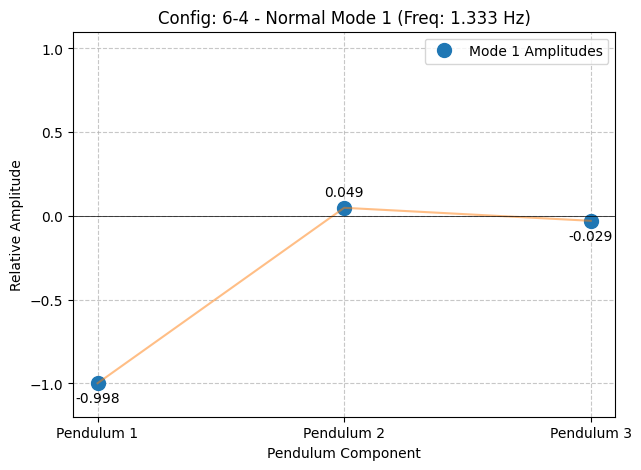

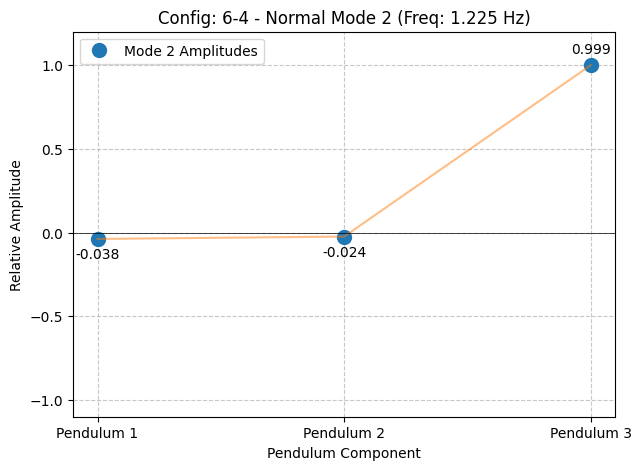

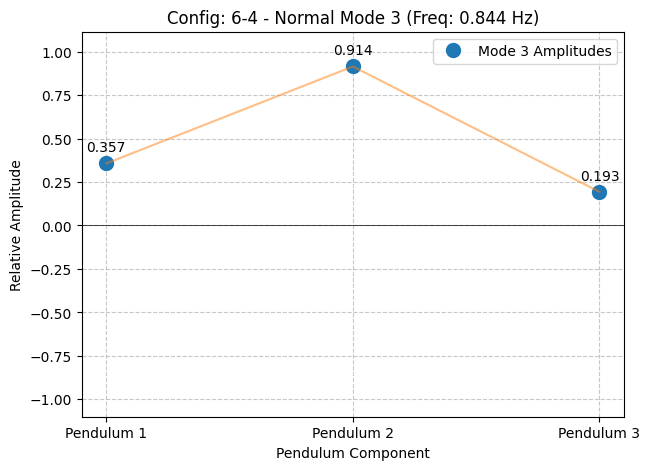


--- Generating plots for Configuration: 6-6 ---


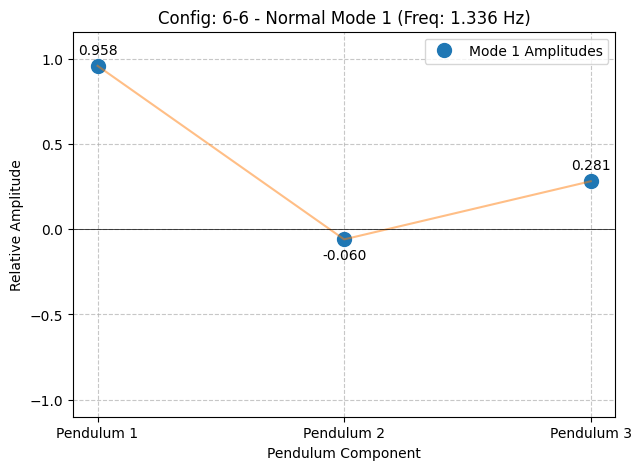

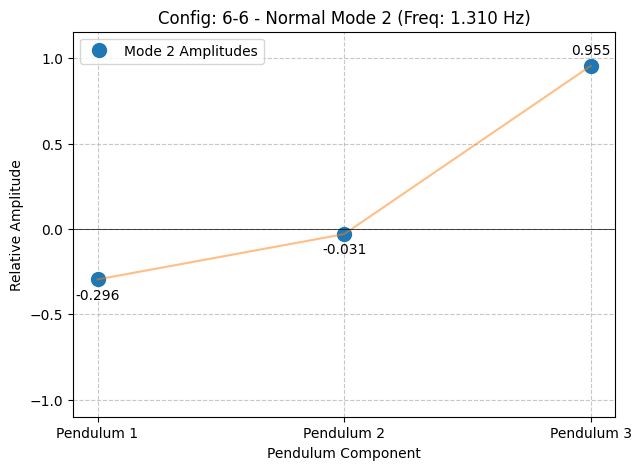

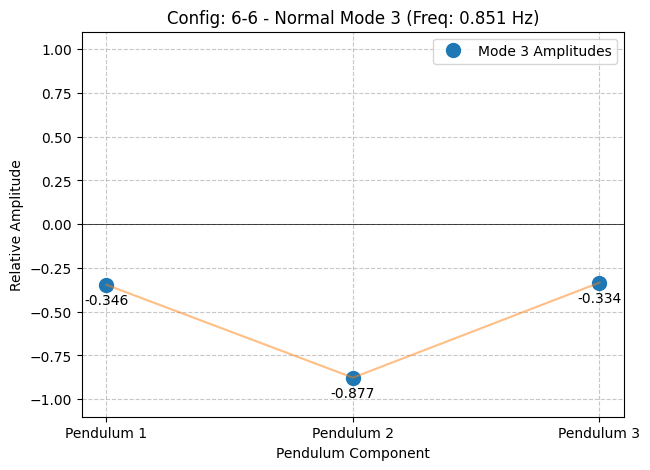

In [3]:
# --- Plotting Normal Modes for Each Configuration (Scatter Plots) ---

# The 'all_results' list should be populated from a previous cell
# It contains dictionaries, each with 'config_label', 'frequencies_hz', and 'eigenvectors'

pendulum_indices = np.arange(1, 4)  # For x-axis: Pendulum 1, 2, 3

for result in all_results:
    config_label = result['config_label']
    frequencies_hz = np.array(result['frequencies_hz'])
    # Eigenvectors are stored as list of lists, convert back to numpy array
    # Each column in eigenvectors_A_sorted was an eigenvector
    eigenvectors = np.array(result['eigenvectors'])
    num_modes = eigenvectors.shape[1]
    
    print(f"\n--- Generating plots for Configuration: {config_label} ---")
    
    for i in range(num_modes):
        mode_vector = eigenvectors[:, i]  # Get i-th column (i-th mode)
        frequency_hz = frequencies_hz[i]
        
        plt.figure(figsize=(7, 5))
        # Using plt.plot with 'o' for scatter plot behavior for mode amplitudes
        plt.plot(pendulum_indices, mode_vector, 'o', markersize=10, label=f'Mode {i+1} Amplitudes')
        # Adding lines connecting the points to guide the eye for the mode shape
        plt.plot(pendulum_indices, mode_vector, '-', alpha=0.5)
        
        # Add text labels near each point for clarity (optional, can be busy)
        for j, amp in enumerate(mode_vector):
            plt.text(pendulum_indices[j], amp + np.sign(amp)*0.05, f'{amp:.3f}', ha='center', va='bottom' if amp >=0 else 'top')
            
        plt.xlabel("Pendulum Component")
        plt.ylabel("Relative Amplitude")
        plt.title(f"Config: {config_label} - Normal Mode {i+1} (Freq: {frequency_hz:.3f} Hz)")
        plt.axhline(0, color='black', linewidth=0.5)  # Zero line
        plt.xticks(pendulum_indices, ['Pendulum 1', 'Pendulum 2', 'Pendulum 3'])
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.ylim(min(mode_vector.min() - 0.2, -1.1), max(mode_vector.max() + 0.2, 1.1)) # Dynamic y-limits with some padding
        plt.legend()
        plt.show()
